In [66]:
# Imports of Fun

# These two are to create the directory and filenames of the charts
from pathlib import Path

# This is to specify the location of my modules
import sys as syeet
syeet.path.append(str(Path().cwd())+"/"+"Modules")

# This is to specify the location of the .dat files for this assignment, Github did not like these files so I had to store them somewhere else
datapath = str(Path().cwd()).replace("Aerospace-Computing","Misc/")

# Numpy and PyPlot
import numpy as np
import matplotlib.pyplot as plt
#import sympy as sp
import scipy as spy
import pandas as pd

# My library
import kavouras1 as k
import textbook as t

# Inline outputs of matplotlib
%matplotlib inline

# Sympy symbols
#x,y = sp.symbols('x y')

In [67]:
# Part 1

def myfft(xlow,xhigh,barwidth):
    N = 300
    T = 1/N
    x=np.linspace(xlow,xhigh,N,endpoint=False)
    y=2*(np.sin((2*np.pi*x)/7))-4*np.sin((3*np.pi*x)/5)
    fig,ax =plt.subplots(1,2)
    fig.set_size_inches([9,5])
    ax[0].plot(x,y)
    ax[0].set_xlabel('x')
    ax[0].set_ylabel('y')
    amp=abs(np.fft.fft(y))[:N//2]
    freq=np.fft.fftfreq(N,T)[:N//2]
    ax[1].bar(freq,2*amp/N,width=barwidth)
    ax[1].plot(freq,2*amp/N,'*r')
    ax[1].set_xlabel('frequency')
    ax[1].set_ylabel('amplitude')
    ax[1].set_xlim(0,30)
    return

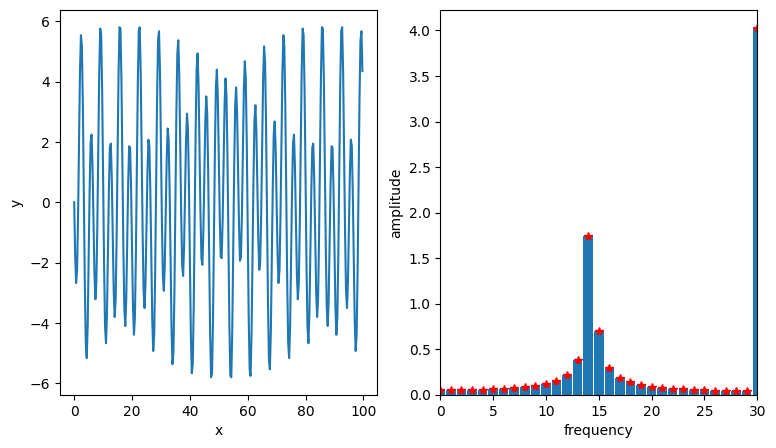

In [68]:
myfft(0,100,barwidth=.9)

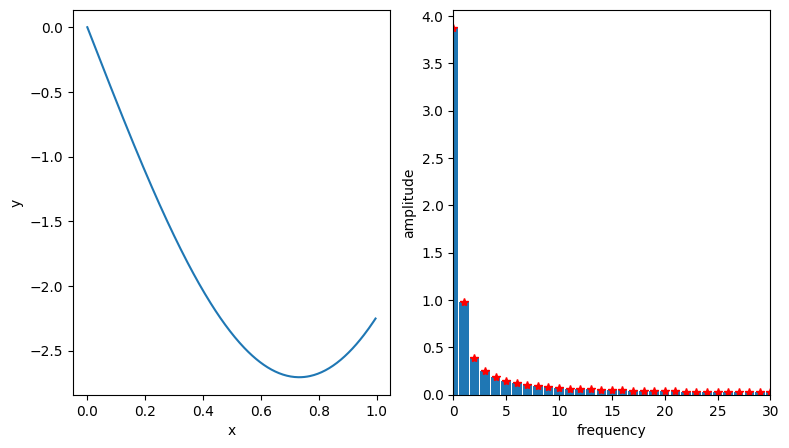

In [69]:
myfft(0,1,barwidth=.9)

In [70]:
df1 = pd.read_table(datapath+'CupData1.dat', sep='[,]', header=None,engine='python')
#df2 = pd.read_table(datapath+'CupData2.dat', sep='[,]', header=None,engine='python')
#df3 = pd.read_table(datapath+'CupData3.dat', sep='[,]', header=None,engine='python')

In [71]:
# first five lines of the data
df1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-33.187146,11.659590,44.870874,24.160355,19.944624,11.081269,8.547520,-9.325361,17.151736,11.612166,-88.089804,13.140052,-16.208275
1,-23.057524,7.569368,44.766057,32.077742,23.086651,7.365389,12.770179,-18.491453,31.975509,47.599750,-95.210278,19.118124,-29.479960
2,-13.530453,0.008759,27.257497,18.394982,5.557257,20.162500,-5.264676,-7.430993,36.696230,54.939842,-87.309390,21.410501,-32.878584
3,-13.953629,-8.950380,13.837389,30.861538,-8.638096,13.578662,-6.853034,-12.374574,26.252201,30.791817,-84.486587,11.078037,-50.255834
4,-17.393501,-10.313200,16.925315,28.560247,-8.507795,10.513896,-14.584892,-14.664233,37.487376,44.473912,-57.620183,20.241948,-64.484705


In [72]:
df1.shape

(1024000, 13)

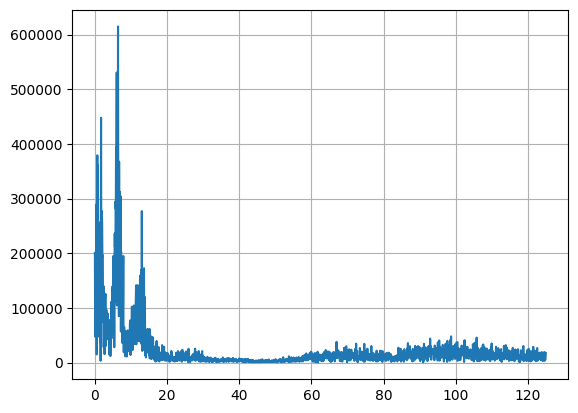

In [77]:
# Series of steps described in the explanation video

# Setup initial parameters
# Size of  frequency buckets (4096), po (min. audible sound level), and total time
N = 4096
po = 0
# Compute chunk size by using the bucket size(250 - given) and
# calculate the time period based on no. of buckets
T = 1/(df1.shape[0]/N)
# Split the data into ensembles based on chunk size

# Compute the DFT and its magnitude
amp1 = abs(np.fft.fft(df1[0]))[:N//2]
freq1 = np.fft.fftfreq(N,T)[:N//2]
# Average all the ensembles
#    amp=abs(np.fft.fft(y))[:N//2]
#    freq=np.fft.fftfreq(N,T)[:N//2]
# Compute the RMS

# Calculate SPL

#
plt.plot(freq1,amp1)
plt.grid()
plt.show()